# Zerobase EDA 과제1

## 스타벅스와 이디야 매장 데이터 분석

### 한글 깨짐 방지

Text(0.5, 1.0, '데이터 사이언스')

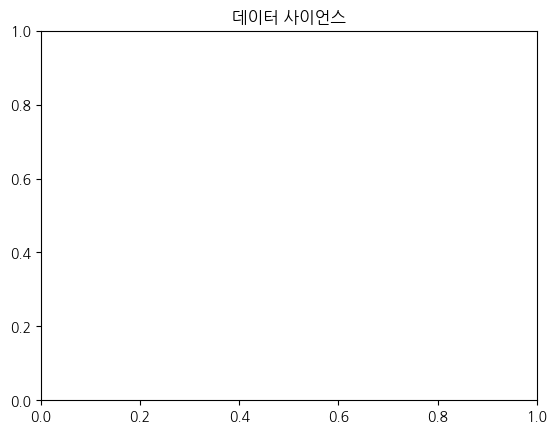

In [1]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('데이터 사이언스')

## [문제 1] 서울시의 스타벅스 매장의 이름과 주소, 구 이름을 pandas data frame으로 정리해 두세요.

스타벅스 매장 지도 홈페이지 - https://www.starbucks.co.kr/store/store_map.do

In [14]:
# 스타벅스 홈페이지 접속
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.starbucks.co.kr/store/store_map.do')

In [15]:
# 지역 검색 클릭
from selenium.webdriver.common.by import By

search_btn = driver.find_element(By.CSS_SELECTOR, '#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a')
search_btn.click()

In [16]:
# 서울시 클릭
sido = driver.find_element(By.CLASS_NAME, 'set_sido_cd_btn')
sido.click()

In [17]:
# 전체 클릭
sido = driver.find_element(By.CLASS_NAME, 'set_gugun_cd_btn')
sido.click()

In [18]:
# 전체에 나와있는 html 저장
from bs4 import BeautifulSoup

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
name = soup.select('#mCSB_3_container > ul > li')

In [ ]:
# 가게 이름, 주소, 구 이름 저장
from tqdm import tqdm_notebook
import time

datas = []

for data in tqdm_notebook(name):
    print(data)
    cafe_name = data.select_one('strong').text[:-2]
    address = data.select_one('p').text[:-9]
    gu = data.select_one('p').text.split(' ')[1]

    datas.append(
        {
            '이름': cafe_name,
            '주소': address,
            '구 이름': gu
        }
    )
    time.sleep(1)

In [63]:
datas

[{'이름': '역삼아레나빌딩', '주소': '서울특별시 강남구 언주로 425 (역삼동)', '구 이름': '강남구'},
 {'이름': '논현역사거리', '주소': '서울특별시 강남구 강남대로 538 (논현동)', '구 이름': '강남구'},
 {'이름': '신사역성일빌딩', '주소': '서울특별시 강남구 강남대로 584 (논현동)', '구 이름': '강남구'},
 {'이름': '국기원사거리', '주소': '서울특별시 강남구 테헤란로 125 (역삼동)', '구 이름': '강남구'},
 {'이름': '대치재경빌딩', '주소': '서울특별시 강남구 남부순환로 2947 (대치동)', '구 이름': '강남구'},
 {'이름': '봉은사역', '주소': '서울특별시 강남구 봉은사로 619 (삼성동)', '구 이름': '강남구'},
 {'이름': '압구정윤성빌딩', '주소': '서울특별시 강남구 논현로 834 (신사동)', '구 이름': '강남구'},
 {'이름': '코엑스별마당', '주소': '서울특별시 강남구 영동대로 513 (삼성동)', '구 이름': '강남구'},
 {'이름': '삼성역섬유센터R', '주소': '서울특별시 강남구 테헤란로 518 (대치동)', '구 이름': '강남구'},
 {'이름': '압구정R', '주소': '서울특별시 강남구 언주로 861 (신사동)', '구 이름': '강남구'},
 {'이름': '수서역R', '주소': '서울특별시 강남구 광평로 281 (수서동)', '구 이름': '강남구'},
 {'이름': '양재강남빌딩R', '주소': '서울특별시 강남구 남부순환로 2621 (도곡동)', '구 이름': '강남구'},
 {'이름': '선릉동신빌딩R', '주소': '서울특별시 강남구 테헤란로 409 (삼성동)', '구 이름': '강남구'},
 {'이름': '봉은사로선정릉', '주소': '서울특별시 강남구 봉은사로 446 (삼성동)', '구 이름': '강남구'},
 {'이름': '강남오거리', '주소': '서울특별시 강남구 봉은사로2길 39 (역

In [64]:
# 데이터 프레임으로 변환
import pandas as pd

starbucks_df = pd.DataFrame(datas)
starbucks_df

,이름,주소,구 이름
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구
...,...,...,...
608,사가정역,서울특별시 중랑구 면목로 310,중랑구
609,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구
610,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구
611,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구


In [69]:
starbucks_df.to_csv('starbucks.csv')

In [65]:
driver.close()

## [문제 2] 서울시의 이디야 매장의 이름과 주소, 구 이름을 pandas data frame으로 정리해 두세요.

이디야 매장 지도 홈페이지 - https://www.ediya.com/contents/find_store.html

In [97]:
# 이디야 홈페이지 접속
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.ediya.com/contents/find_store.html')

In [98]:
# 주소 클릭
address_btn = driver.find_element(By.CSS_SELECTOR, '#contentWrap > div.contents > div > div.store_search_pop > ul > li:nth-child(2) > a')
address_btn.click()

In [99]:
# 스타벅스 데이터 프레임에서 구 이름 컬럼만 가져와서 앞에 서울 붙여주기(강남이나 중구는 검색량이 많아서 저장이 안되는 것을 방지하기 위해)
gu_list = list(starbucks_df['구 이름'].unique())
gu_list = ['서울 ' + gu_name for gu_name in gu_list]
gu_list


['서울 강남구',
 '서울 강북구',
 '서울 강서구',
 '서울 관악구',
 '서울 광진구',
 '서울 금천구',
 '서울 노원구',
 '서울 도봉구',
 '서울 동작구',
 '서울 마포구',
 '서울 서대문구',
 '서울 서초구',
 '서울 성북구',
 '서울 송파구',
 '서울 양천구',
 '서울 영등포구',
 '서울 은평구',
 '서울 종로구',
 '서울 중구',
 '서울 강동구',
 '서울 구로구',
 '서울 동대문구',
 '서울 성동구',
 '서울 용산구',
 '서울 중랑구']

In [109]:
# 이디야 매장 검색은 스타벅스와 달리 주소를 직접 쳐야함...
# 따라서, 앞에서 저장했던 gu_list에 있는 구 이름들을 직접 쳐서 그 구에 있는 매장들을 다 가져와야함
datas2 = []

for gu in gu_list:
    driver.find_element(By.CSS_SELECTOR, '#keyword').clear()
    driver.find_element(By.CSS_SELECTOR, '#keyword').send_keys(gu)
    driver.find_element(By.CSS_SELECTOR, '#keyword_div > form > button').click()

    html2 = driver.page_source
    soup2 = BeautifulSoup(html2, 'html.parser')
    name2 = soup2.select('#placesList > li')

    for data2 in tqdm_notebook(name2):
        cafe_name2 = data2.select_one('dt').text
        address2 = data2.select_one('dd').text
        gu2 = data2.select_one('dd').text.split(' ')[1]

        datas2.append(
            {
                '이름': cafe_name2,
                '주소': address2,
                '구 이름': gu2
            }
        )
        time.sleep(0.5)

C:\Users\emddj\AppData\Local\Temp\ipykernel_19004\1162241359.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data2 in tqdm_notebook(name2):


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

In [111]:
# 데이터 프레임으로 변환
ediya_df = pd.DataFrame(datas2)
ediya_df

,이름,주소,구 이름
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구
...,...,...,...
732,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구
733,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구
734,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구
735,원효로점,서울 용산구 원효로 257 (원효로1가),용산구


In [114]:
ediya_df.to_csv('ediya.csv')

In [115]:
ediya_df

,이름,주소,구 이름
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구
...,...,...,...
719,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구
720,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구
721,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구
722,원효로점,서울 용산구 원효로 257 (원효로1가),용산구


In [116]:
driver.close()

## [문제 3] 데이터 분석 - 이디야 커피는 스타벅스 커피 매장 근처에 있는가?

In [118]:
starbucks_df

,이름,주소,구 이름
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구
...,...,...,...
608,사가정역,서울특별시 중랑구 면목로 310,중랑구
609,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구
610,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구
611,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구


In [119]:
ediya_df

,이름,주소,구 이름
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구
...,...,...,...
719,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구
720,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구
721,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구
722,원효로점,서울 용산구 원효로 257 (원효로1가),용산구


In [120]:
# 스타벅스, 이디야 두 데이터 프레임을 합치기 위해 브랜드 컬럼으로 구분
starbucks_df['브랜드'] = '스타벅스'
ediya_df['브랜드'] = '이디야'


C:\Users\emddj\AppData\Local\Temp\ipykernel_19004\1312939275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ediya_df['브랜드'] = '이디야'


In [121]:
starbucks_df

,이름,주소,구 이름,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스
...,...,...,...,...
608,사가정역,서울특별시 중랑구 면목로 310,중랑구,스타벅스
609,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,스타벅스
610,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,스타벅스
611,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구,스타벅스


In [122]:
ediya_df

,이름,주소,구 이름,브랜드
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구,이디야
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구,이디야
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구,이디야
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구,이디야
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,이디야
...,...,...,...,...
719,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구,이디야
720,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구,이디야
721,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구,이디야
722,원효로점,서울 용산구 원효로 257 (원효로1가),용산구,이디야


In [180]:
# 데이터 프레임 병합
cafe_df = pd.concat([starbucks_df, ediya_df])
cafe_df

,이름,주소,구 이름,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스
...,...,...,...,...
719,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구,이디야
720,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구,이디야
721,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구,이디야
722,원효로점,서울 용산구 원효로 257 (원효로1가),용산구,이디야


In [181]:
# 인덱스 재정렬
cafe_df.reset_index(inplace=True)

In [182]:
cafe_df

,index,이름,주소,구 이름,브랜드
0,0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스
1,1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스
2,2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스
3,3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스
4,4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스
...,...,...,...,...,...
1332,719,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구,이디야
1333,720,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구,이디야
1334,721,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구,이디야
1335,722,원효로점,서울 용산구 원효로 257 (원효로1가),용산구,이디야


In [183]:
# 필요 없는 컬럼 제거
cafe_df.drop('index', axis=1, inplace=True)
cafe_df

,이름,주소,구 이름,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스
...,...,...,...,...
1332,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구,이디야
1333,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구,이디야
1334,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구,이디야
1335,원효로점,서울 용산구 원효로 257 (원효로1가),용산구,이디야


In [154]:
cafe_df.to_csv('starbucks_ediya.csv')

In [184]:
import googlemaps
import folium
import numpy as np

# API 가져오기
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

lat = []
lng = []

for idx, rows in tqdm_notebook(cafe_df.iterrows()):
    addr_detail = gmaps.geocode(rows["주소"], language="ko")
    if addr_detail:
        location_ouput = addr_detail[0].get("geometry")
        lat.append(location_ouput["location"]["lat"])
        lng.append(location_ouput["location"]["lng"])
    else:
        lat.append(np.nan)
        lng.append(np.nan)


C:\Users\emddj\AppData\Local\Temp\ipykernel_19004\1439057915.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, rows in tqdm_notebook(cafe_df.iterrows()):


0it [00:00, ?it/s]

In [185]:
cafe_df['위도'] = lat
cafe_df['경도'] = lng
cafe_df.head()

,이름,주소,구 이름,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.500078,127.038542
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.513679,127.031712
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.513679,127.031712
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.499615,127.031676
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.494525,127.062584


In [186]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      1337 non-null   object 
 1   주소      1337 non-null   object 
 2   구 이름    1337 non-null   object 
 3   브랜드     1337 non-null   object 
 4   위도      1327 non-null   float64
 5   경도      1327 non-null   float64
dtypes: float64(2), object(4)
memory usage: 62.8+ KB


In [187]:
# 위도, 경도에 결측치가 있어서 결측치 제거
cafe_df = cafe_df.dropna(axis=0)
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      1327 non-null   object 
 1   주소      1327 non-null   object 
 2   구 이름    1327 non-null   object 
 3   브랜드     1327 non-null   object 
 4   위도      1327 non-null   float64
 5   경도      1327 non-null   float64
dtypes: float64(2), object(4)
memory usage: 72.6+ KB


In [189]:
cafe_df.reset_index(drop=True, inplace=True)
cafe_df

,이름,주소,구 이름,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.500078,127.038542
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.513679,127.031712
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.513679,127.031712
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.499615,127.031676
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.494525,127.062584
...,...,...,...,...,...,...
1322,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구,이디야,37.550039,126.967606
1323,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구,이디야,37.543163,126.963669
1324,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",용산구,이디야,37.549481,126.977665
1325,원효로점,서울 용산구 원효로 257 (원효로1가),용산구,이디야,37.539980,126.967447


In [190]:
# 지도 시각화 - 녹색은 스타벅스, 파란색은 이디야
geo_df = cafe_df.copy()

my_map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=12)

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n,'브랜드'] + ' - ' + geo_df.loc[n,'주소']

  icon_color = 'blue'
  if geo_df.loc[n,'브랜드'] == '스타벅스':
    icon_color = 'green'
  
  folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                 popup=popup_name,
                 icon=folium.Icon(color=icon_color,icon='coffee',prefix='fa')).add_to(my_map)

my_map

### 서울 전체 구의 스타벅스와 이디야는 육안으로 봤을 때는 대체적으로 붙어있는 편이다.
### 너무 많아서 잘 안 보이니 대표적으로 카페수가 비교적 많은 강남구만 다시 한번 보겠다.

In [192]:
# 구 이름이 강남구인 것만 추출해서 새 데이터 프레임에 적재
gangnam_cafe_df = cafe_df[cafe_df['구 이름'] == '강남구']
gangnam_cafe_df.reset_index(drop=True, inplace=True)
gangnam_cafe_df

,이름,주소,구 이름,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.500078,127.038542
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.513679,127.031712
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.513679,127.031712
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.499615,127.031676
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.494525,127.062584
...,...,...,...,...,...,...
130,청담역점,"서울 강남구 삼성로 721 (청담동, 룩희 819)",강남구,이디야,37.520068,127.049163
131,포이사거리점,서울 강남구 개포로 218 (개포동),강남구,이디야,37.478468,127.046625
132,학동역점,"서울 강남구 학동로 219 (논현동, 국제빌딩)",강남구,이디야,37.509793,127.021578
133,학동제마점,서울 강남구 학동로34길 22 (논현동),강남구,이디야,37.513139,127.033650


In [193]:
# 지도 시각화
geo_df2 = gangnam_cafe_df.copy()

gangnam_map = folium.Map(location=[geo_df2['위도'].mean(),geo_df2['경도'].mean()],zoom_start=12)

for n in geo_df2.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df2.loc[n,'브랜드'] + ' - ' + geo_df2.loc[n,'주소']

  icon_color = 'blue'
  if geo_df2.loc[n,'브랜드'] == '스타벅스':
    icon_color = 'green'
  
  folium.Marker([geo_df2.loc[n,'위도'], geo_df2.loc[n,'경도']],
                 popup=popup_name,
                 icon=folium.Icon(color=icon_color,icon='coffee',prefix='fa')).add_to(gangnam_map)

gangnam_map

### 강남구에서도 서울 전체와 같이 이디야와 스타벅스는 인접해있는 편이다.
### 스타벅스와 이디야는 전체적으로 봤을 때와 일부분만 봤을 때에도 인접해있는 것으로 보아 서로 인접해있다고 볼 수 있다.